<a href="https://colab.research.google.com/github/roupenminassian/Freelance/blob/main/NLP%20(Logistic_Regression)%20for%20Twitter%20Event%20Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

import nltk
from nltk.corpus import twitter_samples
import matplotlib.pyplot as plt
import random 

nltk.download('stopwords')

import re
import string

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/nlp-getting-started/train.csv')
df2 = pd.read_csv('/content/drive/MyDrive/nlp-getting-started/test.csv')

In [ ]:
df2.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [ ]:
tweet_test = df2['text']

In [ ]:
tweet = df['text']
label = df['target']
tweet2 = []
for i in tweet:
  i = re.sub('#', '', i)
  i = re.sub(r'https?:\/\/.*[\r\n]*', '', i)
  tweet2.append(i)

In [ ]:
label_final = []
for i in label:
  label_final.append(i)

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(tweet2)

In [ ]:
stopwords_english = stopwords.words('english')
tweets_clean = []

for word in tweet2:
    if (word not in stopwords_english and  # remove stopwords
        word not in string.punctuation):  # remove punctuation
        tweets_clean.append(word)

In [ ]:
stemmer = PorterStemmer() 

# Create an empty list to store the stems
tweets_final = [] 

for word in tweets_clean:
    stem_word = stemmer.stem(word)  # stemming word
    tweets_final.append(stem_word) 

In [ ]:
def process_tweet(tweet):
  stemmer = PorterStemmer()
  stopwords_english = stopwords.words('english')
  tweet = re.sub(r'\$\w*', '', tweet)
  tweet = re.sub(r'^RT[\s]+', '', tweet)
  tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet)
  tweet = re.sub(r'#', '', tweet)
  tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,reduce_len=True)
  tweet_tokens = tokenizer.tokenize(tweet)

  tweets_clean = []
  for word in tweet_tokens:
      if (word not in stopwords_english and  
              word not in string.punctuation): 
          stem_word = stemmer.stem(word)  # stemming word
          tweets_clean.append(stem_word)

  return tweets_clean

In [ ]:
def build_freqs(tweets, ys):

    yslist = np.squeeze(ys).tolist()

    freqs = {}
    for y, tweet in zip(yslist, tweets):
        for word in process_tweet(tweet):
            pair = (word, y)
            if pair in freqs:
                freqs[pair] += 1
            else:
                freqs[pair] = 1    
    return freqs

In [ ]:
freqs = build_freqs(tweets_final, label_final)

In [ ]:
keys = ['earthquak', 'forest', 'flood', 'evacu', 'disast', 'accident', 'wildfir', '...', 'peopl']

data = []

for word in keys:
    
    pos = 0
    neg = 0
    
    if (word, 1) in freqs:
        pos = freqs[(word, 1)]
        
    if (word, 0) in freqs:
        neg = freqs[(word, 0)]
        
    data.append([word, pos, neg])
    
data

[['earthquak', 27, 16],
 ['forest', 40, 23],
 ['flood', 85, 78],
 ['evacu', 83, 46],
 ['disast', 65, 93],
 ['accident', 2, 4],
 ['wildfir', 49, 31],
 ['...', 462, 572],
 ['peopl', 70, 128]]

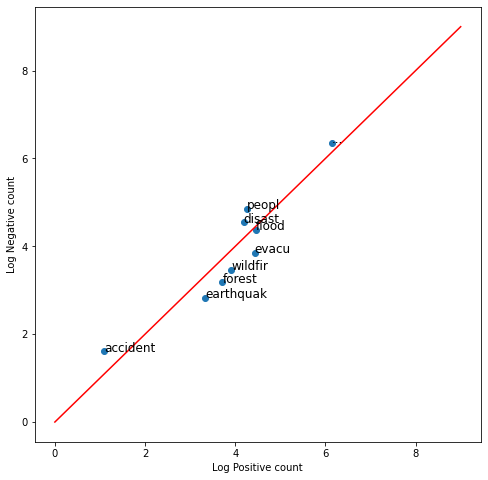

In [ ]:
fig, ax = plt.subplots(figsize = (8, 8))

x = np.log([x[1] + 1 for x in data])  

y = np.log([x[2] + 1 for x in data]) 

ax.scatter(x, y)  

plt.xlabel("Log Positive count")
plt.ylabel("Log Negative count")

for i in range(0, len(data)):
    ax.annotate(data[i][0], (x[i], y[i]), fontsize=12)

ax.plot([0, 9], [0, 9], color = 'red')
plt.show()

In [ ]:
print(freqs)

{('deed', 1): 1, ('reason', 1): 11, ('earthquak', 1): 27, ('may', 1): 34, ('allah', 1): 6, ('forgiv', 1): 1, ('us', 1): 46, ('al', 1): 6, ('forest', 1): 40, ('fire', 1): 175, ('near', 1): 31, ('la', 1): 15, ('rong', 1): 1, ('sask', 1): 1, ('canada', 1): 6, ('resid', 1): 5, ('ask', 1): 18, ('shelter', 1): 6, ('place', 1): 17, ('notifi', 1): 1, ('offic', 1): 26, ('evacu', 1): 83, ('order', 1): 20, ('expect', 1): 12, ('13,000', 1): 1, ('peopl', 1): 70, ('receiv', 1): 2, ('wildfir', 1): 49, ('california', 1): 57, ('got', 1): 37, ('sent', 1): 6, ('photo', 1): 29, ('rubi', 1): 1, ('alaska', 1): 4, ('smoke', 1): 16, ('pour', 1): 1, ('school', 1): 31, ('rockyfir', 1): 4, ('updat', 1): 24, ('hwi', 1): 5, ('20', 1): 12, ('close', 1): 22, ('direct', 1): 5, ('due', 1): 21, ('lake', 1): 9, ('counti', 1): 14, ('cafir', 1): 1, ('flood', 1): 85, ('disast', 1): 65, ('heavi', 1): 11, ('rain', 1): 33, ('caus', 1): 34, ('flash', 1): 10, ('street', 1): 20, ('manit', 1): 1, ('colorado', 1): 10, ('spring', 1

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
train_x = vectorizer.fit_transform(tweets_final).toarray()
test_x = vectorizer.transform(tweet_test).toarray()

In [ ]:
lr = 0.004
n_epochs = 12000

weights_vector = np.random.random(train_x.shape[1])

def cost_function(pred,truth):
    return -truth*np.log(pred) - (1-truth)*np.log(1-pred)

def sigmoid(x):
    return 1.0/(1+np.exp(-x))

def lin_mul(x,weights):
    return np.dot(x,weights)

for ep in range(n_epochs):
    avg_cost = 0
    for i in range(len(train_x)):
        data_point = train_x[i]
        label  = label_final[i]
        pred_prob = sigmoid(lin_mul(weights_vector,data_point))
        avg_cost += cost_function(pred_prob,label)
        weights_vector = weights_vector - lr*(pred_prob - label)* data_point
    if ep%100==0:
        print ("Epoch {} has finished. Error is {}".format(ep+1,avg_cost/4.0))

Epoch 1 has finished. Error is 4015.4240093671324
Epoch 101 has finished. Error is 774.4977836210896
Epoch 201 has finished. Error is 585.2193459493669
Epoch 301 has finished. Error is 491.7456153211119
Epoch 401 has finished. Error is 432.62130794013484
Epoch 501 has finished. Error is 390.9349048634891
Epoch 601 has finished. Error is 359.65310826910087
Epoch 701 has finished. Error is 335.18481316053044
Epoch 801 has finished. Error is 315.4606771750045
Epoch 901 has finished. Error is 299.18909517753696
Epoch 1001 has finished. Error is 285.5162139019554
Epoch 1101 has finished. Error is 273.852393828228
Epoch 1201 has finished. Error is 263.77617126134925
Epoch 1301 has finished. Error is 254.97770217034574
Epoch 1401 has finished. Error is 247.22378298716902
Epoch 1501 has finished. Error is 240.33534187646404
Epoch 1601 has finished. Error is 234.17247130747236
Epoch 1701 has finished. Error is 228.62419477187348
Epoch 1801 has finished. Error is 223.60130043617997
Epoch 1901 ha

In [ ]:
preds = np.where(sigmoid(lin_mul(test_x,weights_vector))>.75,1,0)

In [ ]:
print(preds)

[0 1 0 ... 0 0 0]


In [ ]:
id = pd.DataFrame(df2['id'])
preds = pd.DataFrame(preds, columns=['target'])
final = pd.concat([id, preds], axis=1)

In [ ]:
final.to_csv('final_submission.csv',index=False)